# Exploratory Data Analysis - sklearn Wine Dataset

## Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from pandas.plotting import scatter_matrix

# ---------------------------------------------------------------------
# Load dataset
# ---------------------------------------------------------------------
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# ---------------------------------------------------------------------
# Statistical summary
# ---------------------------------------------------------------------
df.info()
display(df.describe())

# ---------------------------------------------------------------------
# Missing value analysis
# ---------------------------------------------------------------------
print("Missing Values:")
display(df.isna().sum())

# Identify highly correlated feature pairs
corr = df.drop(columns=['target']).corr()
high_corr = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        .stack()
        .reset_index()
)
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
sorted_corr = high_corr.sort_values('Correlation')

top_positive = sorted_corr.tail(5)
display(top_positive)
top_negative = sorted_corr.head(5)
display(top_negative)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Missing Values:


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

,Feature 1,Feature 2,Correlation
11,alcohol,proline,0.643720
58,flavanoids,proanthocyanins,0.652692
55,total_phenols,od280/od315_of_diluted_wines,0.699949
61,flavanoids,od280/od315_of_diluted_wines,0.787194
50,total_phenols,flavanoids,0.864564


,Feature 1,Feature 2,Correlation
20,malic_acid,hue,-0.561296
57,flavanoids,nonflavanoid_phenols,-0.537900
72,color_intensity,hue,-0.521813
66,nonflavanoid_phenols,od280/od315_of_diluted_wines,-0.503270
51,total_phenols,nonflavanoid_phenols,-0.449935


## Histograms and Visualizations

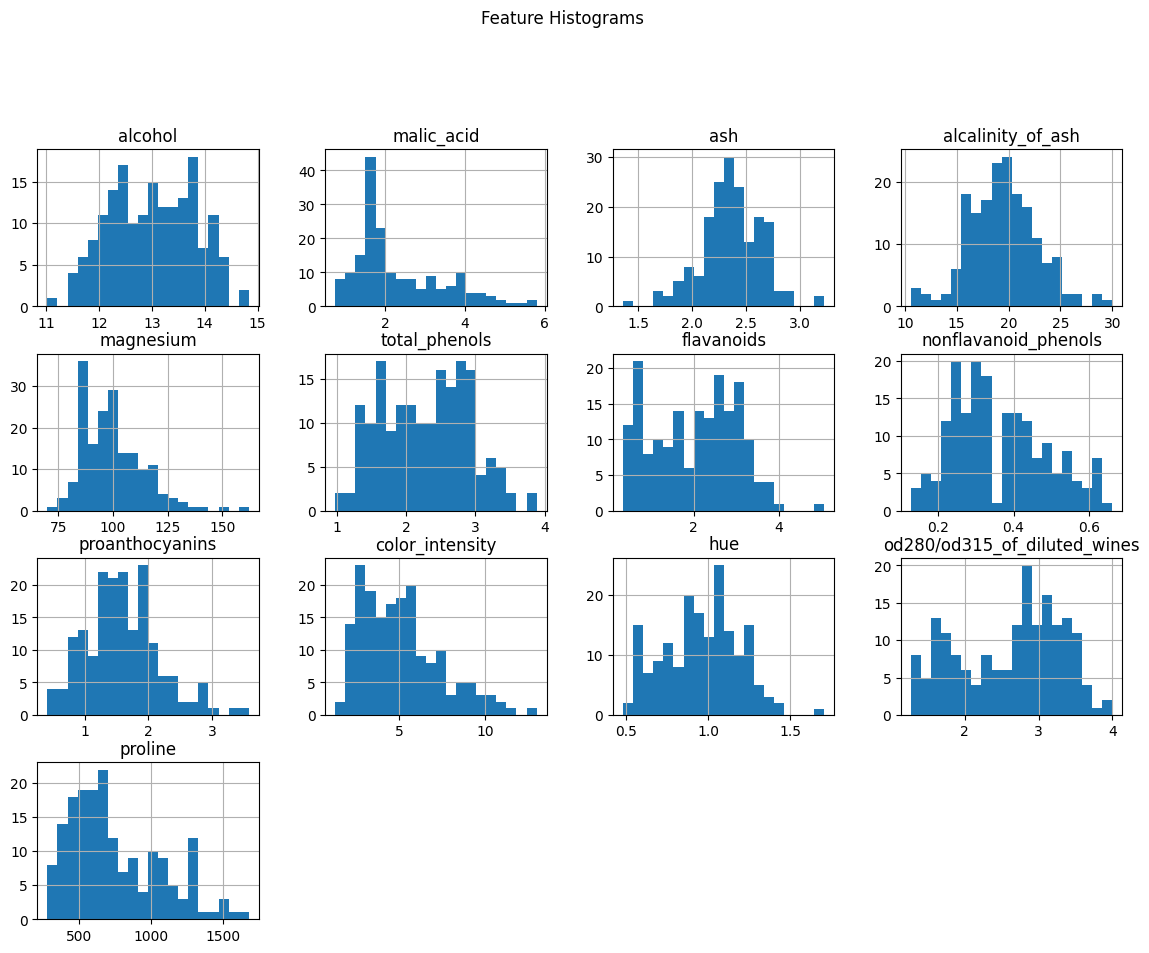

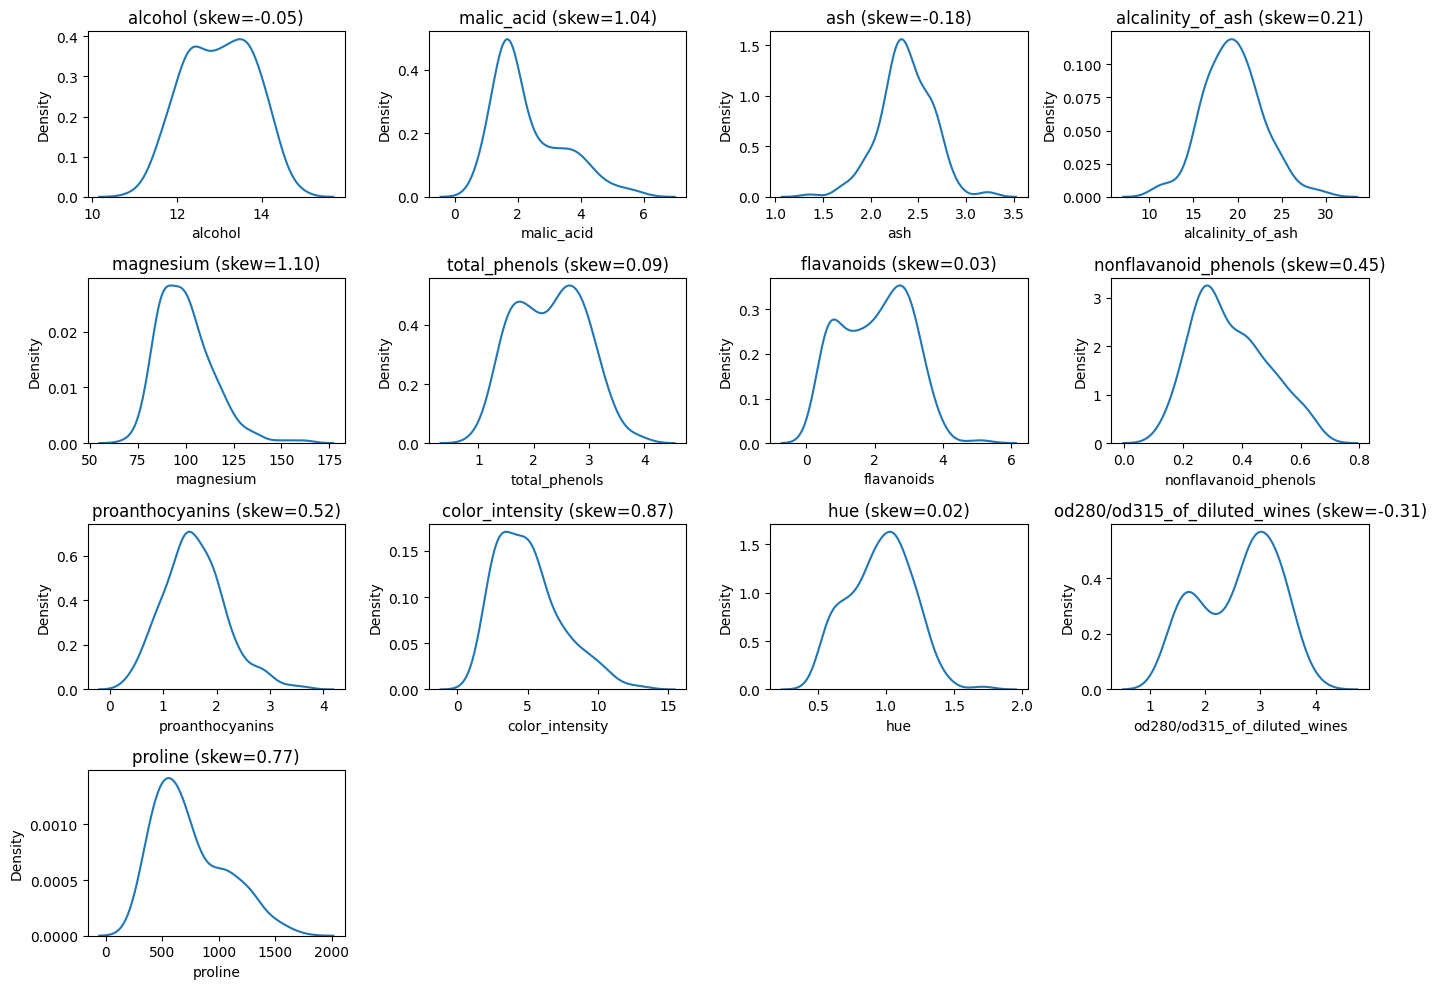

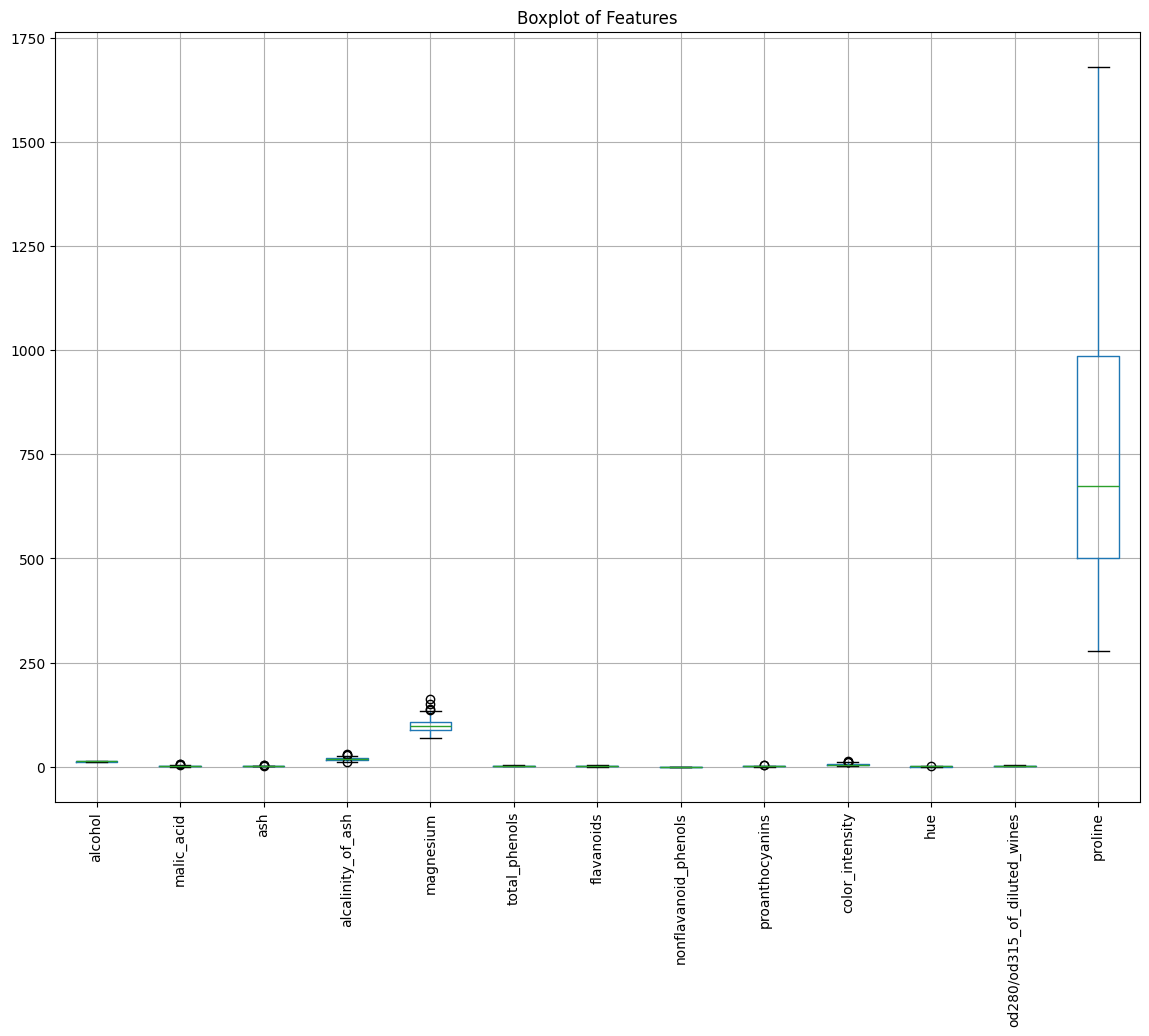

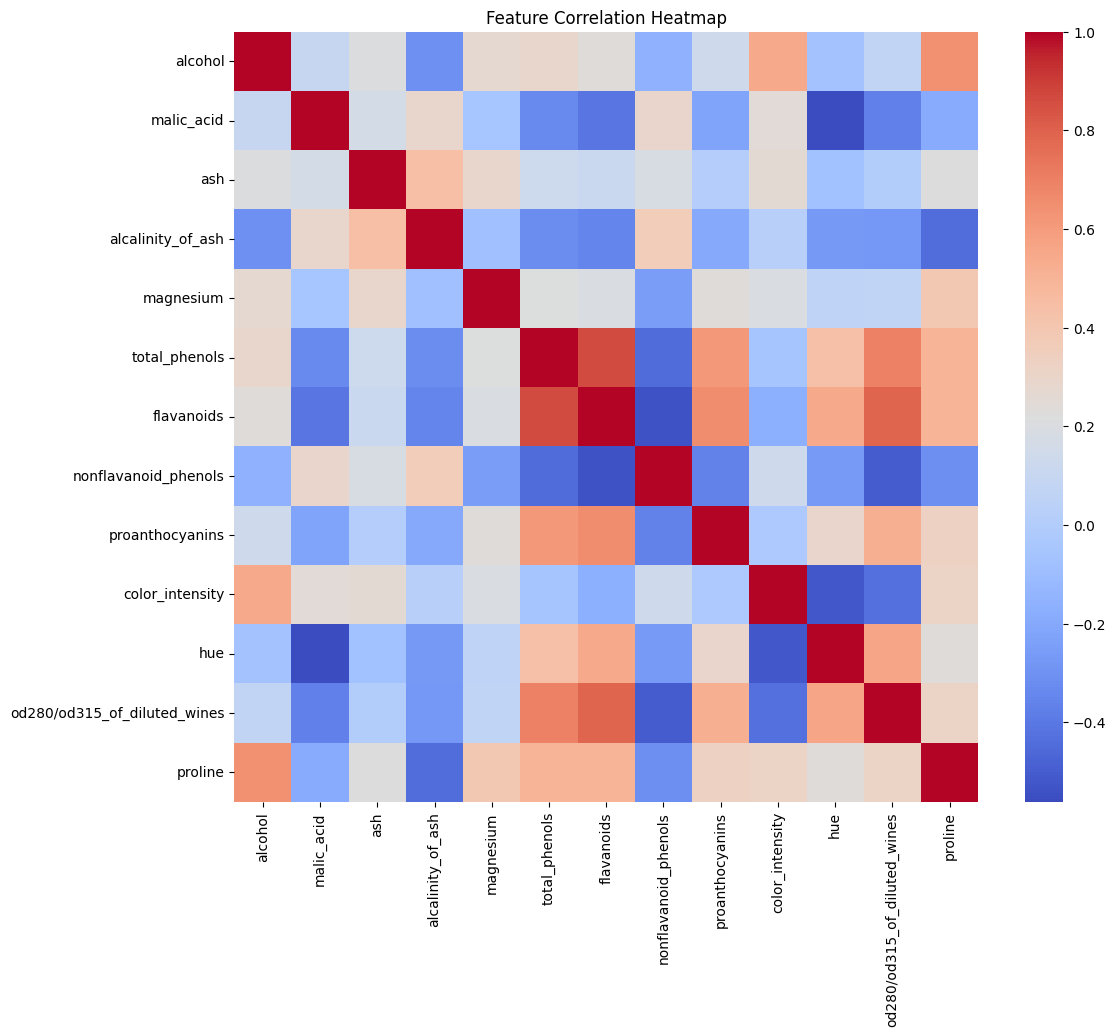

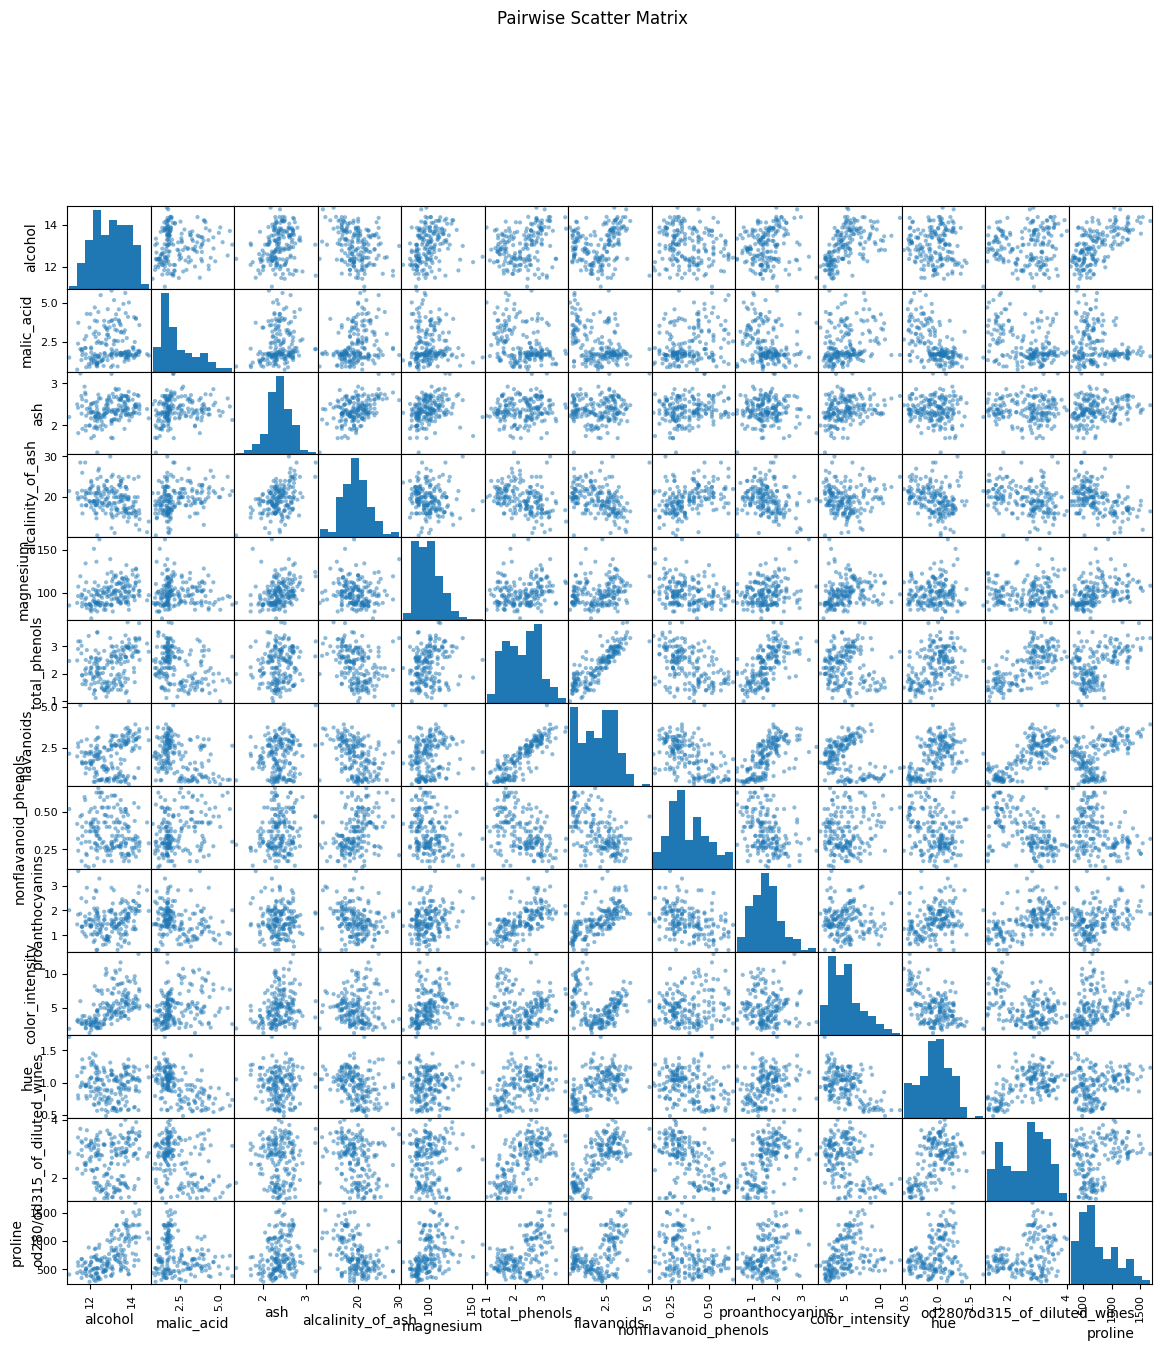

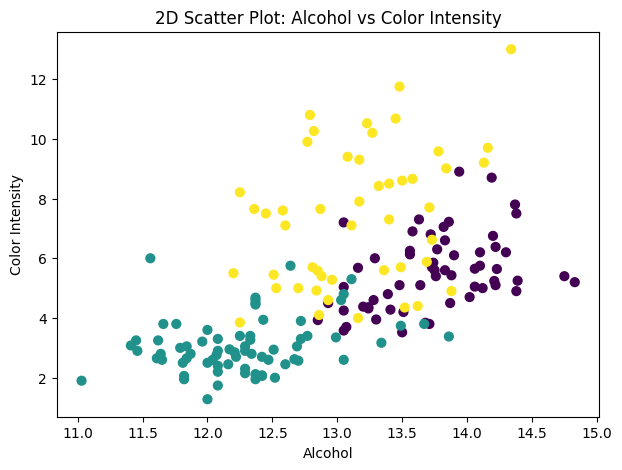

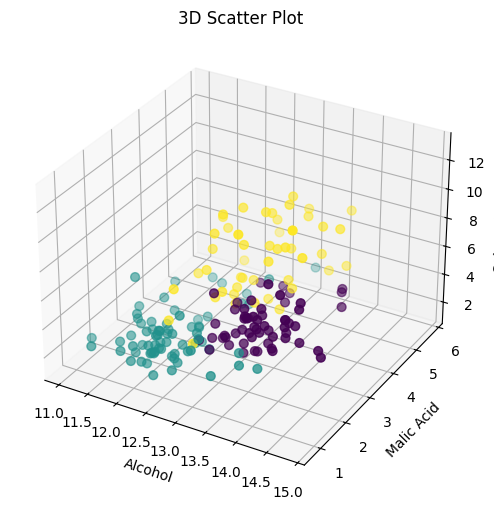

In [2]:
# ---------------------------------------------------------------------
# Distribution analysis
# ---------------------------------------------------------------------
df.drop(columns=['target']).hist(bins=20, figsize=(14, 10))
plt.suptitle("Feature Histograms", y=1.02)
plt.show()

plt.figure(figsize=(14, 10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(df[col])
    plt.title(f"{col} (skew={df[col].skew():.2f})")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Box plots
# ---------------------------------------------------------------------
plt.figure(figsize=(14, 10))
df.drop(columns=['target']).boxplot(rot=90)
plt.title("Boxplot of Features")
plt.show()

# ---------------------------------------------------------------------
# Correlation matrix + heatmap
# ---------------------------------------------------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# ---------------------------------------------------------------------
# Pairwise scatterplots
# ---------------------------------------------------------------------
scatter_matrix(df.drop(columns=['target']), figsize=(14, 14), diagonal='hist')
plt.suptitle("Pairwise Scatter Matrix", y=1.02)
plt.show()



# ---------------------------------------------------------------------
# Initial 2D visual exploration
# ---------------------------------------------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(df['alcohol'], df['color_intensity'], c=df['target'], s=40)
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.title("2D Scatter Plot: Alcohol vs Color Intensity")
plt.show()

# ---------------------------------------------------------------------
# Initial 3D exploration
# ---------------------------------------------------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['alcohol'], df['malic_acid'], df['color_intensity'], c=df['target'], s=40)
ax.set_xlabel("Alcohol")
ax.set_ylabel("Malic Acid")
ax.set_zlabel("Color Intensity")
ax.set_title("3D Scatter Plot")
plt.show()